# Named Entity Recognition

In [1]:
import spacy
from nltk import sent_tokenize

In [2]:
# !python -m spacy download en_core_web_trf

# Load model

In [3]:
def load_model():
    nlp = spacy.load("en_core_web_trf")
    return nlp

In [4]:
model = load_model()

C:\Users\SURYA B.S\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\SURYA B.S\Documents\series\venv\Lib\site-packages\thinc\shims\pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

In [5]:
import os
import sys
import pathlib
folder_path = pathlib.Path().parent.resolve()
sys.path.append(os.path.join(folder_path, '../'))
from utils import load_subtitles_dataset

In [6]:
dataset_path = "../data/subtitles"
df = load_subtitles_dataset(dataset_path)

In [7]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."
...,...,...
213,216,"Summoning Jutsu!\n Oh, long time no see.\n We ..."
214,217,Gaara.\n Kankuro.\n Gaara.\n Primary Lotus!\n ...
215,218,To think the Leaf’s reinforcements will be you...
216,219,"Fly into the wavy and twisted sky, into your h..."


In [8]:
sample_script = df.iloc[0]['script']
sample_script

'A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can\'t let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you! Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here, lruka Sensei?\n The question is what are you doing here when you should 

In [9]:
sentences = sent_tokenize(sample_script)
sentences

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.',
 'We have to wait until the Fourth Hokage gets here!',
 "We can't let it get any closer to our village!",
 'One great Ninja was able to imprison the monster,\n but died in the process.',
 'This Ninja was known as… the Fourth Hokage.',
 'Naruto!',
 'Why did you do such a thing?!',
 "You're really gonna get it this time!",
 "I don't care!",
 'You know your problem?',
 "You can't do the things I do!",
 'Only I can do this!',
 "I'm better than all of you!",
 'Believe it!',
 "There's a problem, sir!",
 'Lord Hokage!',
 'What is it?',
 'Did that Naruto do something again?',
 'Yes.',
 'He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!',
 'Wait!',
 'Ha ha…\n Why should I?',
 'Hey, Naruto!',
 'How did you suddenly get here, lruka Sensei?',
 'The q

In [10]:
sentences = sentences[60:90]

In [11]:
sentence = ".".join(sentences)
sentence

"Don't you know who the Hokage leaders are?.Of course, I do!.I know they earned the title Lord Hokage\n because they were the best Ninja of their time, right?.Especially the Fourth Hokage was a hero\n who saved the village from the nine-tail demon fox..Then why did you do that?.Because I'll become a Hokage myself..And I'll be the greatest Hokage of all time!.So that everyone will finally learn to accept me!.By the way, Sensei, I have a favor to ask..You want another bowl?.Mmmm…No…\n Can I borrow that Leaf headband for a while?.This?.No no!.This is worn only by those who have graduated from Ninja Academy..Tomorrow, you will…\n You're so mean!.So that's why you took off your goggles…\n Humph... One more bowl please!.We are now about to begin the graduation test..When your name is called, proceed to the next classroom..The test is on the Clone Jutsu..Oh no…\n Of all the…!.That is my weakest Jutsu!.But still… I will do it no matter what!.Clone Jutsu!.Disqualified!.Iruka Sensei..His physica

# Run Model

In [12]:
doc = model(sentence)
doc.ents

c:\Users\SURYA B.S\Documents\series\venv\Lib\site-packages\thinc\shims\pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


(Ninja, Fourth, nine, Leaf, Ninja Academy, Tomorrow, One, three, Naruto, one)

In [13]:
for entity in doc.ents:
    print(entity, entity.label_)

Ninja NORP
Fourth ORDINAL
nine CARDINAL
Leaf PERSON
Ninja Academy ORG
Tomorrow DATE
One CARDINAL
three CARDINAL
Naruto PERSON
one CARDINAL


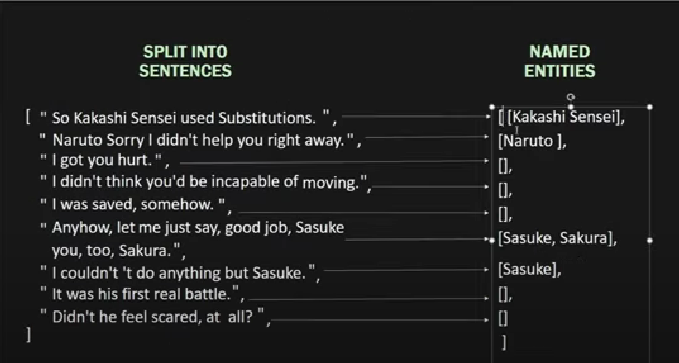

In [14]:
def get_ners_inference(script):
    script_sentences = sent_tokenize(script)
    ner_output = []
    for sentence in script_sentences:
        doc = model(sentence)
        ners = set()
        for entity in doc.ents:
            if entity.label_ ==  "PERSON":
                full_name = entity.text
                first_name = entity.text.split(" ")[0]
                first_name = first_name.strip()
                ners.add(first_name)
        ner_output.append(ners)
    return ner_output
                


In [15]:
df = df.head(10)
df['ners'] = df['script'].apply(get_ners_inference)
df

C:\Users\SURYA B.S\AppData\Local\Temp\ipykernel_4224\2068886206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ners'] = df['script'].apply(get_ners_inference)


,episode,script,ners
0,1,"A long time ago, a powerful demon fox appeared...","[{}, {}, {}, {}, {}, {}, {}, {Naruto}, {}, {},..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {}, {}, {}, {}, {}, {}, {}, {Konohama..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {}, {Sasuke, Sakura}, {}, {Konohamaru..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {}, {Naruto}, {}, {}, {Iruka}, {}, {N..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {..."
5,6,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {Sasuke}, {Sakura}, {Naruto}, {}, {Na..."
6,7,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {..."
7,8,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {}, {}, {}, {}, {}, {Sasuke}, {}, {},..."
8,9,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {..."
9,12,"C'mon!\n Running like a fugitive,\n Being chas...","[{}, {}, {}, {}, {Zabuza}, {}, {}, {}, {Naruto..."


# Character Network

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 
from pyvis.network import Network

In [18]:
def generate_character_network(df):
    windows = 10
    entity_relationship = []

    for row in df['ners']: # for each episode
        previous_entities_in_window = []
        for sentence in row:
            previous_entities_in_window.append(list(sentence))
            previous_entities_in_window = previous_entities_in_window[-windows:]

            previous_entities_flattened = sum(previous_entities_in_window, [])

            for entity in sentence:
                for entity_in_window in previous_entities_flattened:
                    if entity != entity_in_window: # if !=, then not the same character so has relationship
                        entity_relationship.append(sorted([entity, entity_in_window]))
    
    relationship_df = pd.DataFrame({'value': entity_relationship})
    relationship_df['source'] = relationship_df['value'].apply(lambda x: x[0])
    relationship_df['target'] = relationship_df['value'].apply(lambda x: x[1])
    relationship_df = relationship_df.groupby(['source', 'target']).count().reset_index()
    relationship_df = relationship_df.sort_values('value', ascending=False)

    return relationship_df

In [19]:
relationship_df = generate_character_network(df)

TypeError: can only concatenate list (not "str") to list